<a href="https://colab.research.google.com/github/SarahTTAN107/code_snippets/blob/master/3_spam_classifier_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a machine learning model to detect whether a message is spam. 
Dataset is SMS Spam Colelction Dataset, link is here: https://www.kaggle.com/uciml/sms-spam-collection-dataset

### Data import

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive # for importing file from same directory in Drive

In [5]:
# authenticating Google Drive account to import data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data_file_path = "/spam.csv"
messages = pd.read_csv(data_file_path, sep=",", encoding="ISO-8859-1")

In [30]:
messages = messages.dropna(axis=1)
messages.columns = ['label', 'message']

In [31]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Data Cleaning and Processing

In [33]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [24]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  sms = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
  sms = sms.lower()
  sms = sms.split()
  sms = [ps.stem(word) for word in sms if not word in set(stopwords.words('english'))]
  sms = ' '.join(sms)
  corpus.append(sms)
corpus[:2]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni']

### Model 1: Bag of Words model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [52]:
# encode label
label_mapping = {'ham': 0, 'spam': 1}
y = messages['label'].apply(lambda label: label_mapping[label])
y = np.array(y)
# or you can use
# messages['label'] = pd.get_dummies(messages['label'])

In [53]:
print(X[:2])
print(y[:2])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0]


### Train-test split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Train model: Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
spam_detect_model_naive_bayes = MultinomialNB().fit(X_train, y_train)

In [57]:
y_pred=spam_detect_model_naive_bayes.predict(X_test)

# Evaluation

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_m = confusion_matrix(y_test, y_pred)

In [60]:
confusion_m

array([[960,  10],
       [  5, 140]])

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
accuracy

0.9865470852017937

In [64]:
from sklearn.metrics import plot_roc_curve

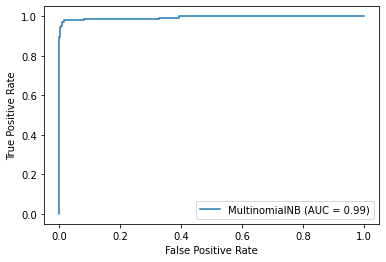

In [65]:
plot_roc_curve(spam_detect_model_naive_bayes, X_test, y_test)